# 【問題1】K-meansクラスの作成

In [1]:
import numpy as np
import math
from sklearn.metrics import accuracy_score
import copy 
import time
import matplotlib.pyplot as plt
%matplotlib inline

class ScratchKMeans():
    """
    決定木分類のスクラッチ実装

    Parameters
    ----------
   　n_clusters : int
      クラスタの数
    max_iter : int
      最大の繰り返し回数
    
    Attributes
    ----------
    self.mu : ndarray (n_clusters, )
      クラスタ重心のパラメーター
    self.sse : float
      学習後のSSEの値
    """

    def __init__(self, n_clusters, max_iter = 300):
        self.n_clusters = n_clusters 
        self.max_iter = max_iter
        self.mu = None
        
    def fit(self, X):
        
        t0 = time.time() #時間の測定
        
        self._init_mu(X) #クラスタ重心のランダムな初期化
        distance_ar = np.zeros(len(X) * self.n_clusters).reshape(len(X), self.n_clusters)
        
        #初期のクラスタ重心での各サンプルの距離を計算
        for k in range(self.n_clusters):
            distance_ar[:, k] = np.linalg.norm(X - self.mu[k, :], axis=1)
        #クラスタラベルを格納
        c_ar = np.argmin(distance_ar, axis=1)
        
        for _ in range(self.max_iter):
            #print("繰り返し: {}回目".format(_))
            #クラスタ重心の更新からの各サンプルの距離を計算
            for k in range(self.n_clusters):
                self.mu[k, :] = X[c_ar == k, :].mean(axis=0)
                distance_ar[:, k] = np.linalg.norm(X - self.mu[k, :], axis=1)
            #新しいクラスタラベルを格納
            new_c_ar = np.argmin(distance_ar, axis=1)
            #クラスタの変更がなければ処理終了
            if np.all(c_ar == new_c_ar):
                break
            c_ar = new_c_ar
       
        self.sse = self.SSE(X, c_ar) #SSEの取得
        #時間の表示
        t1 = time.time()
        print('time : {}s'.format(t1-t0))
        return c_ar
        
    def _init_mu(self, X):
        #初期のクラスタ重心の設定　ランダムにサンプルから取ってくる。
        index = np.arange(len(X))
        np.random.seed(seed=32) #シード値固定注意
        np.random.shuffle(index)
        self.mu = X[index[:self.n_clusters], :]
        
    def SSE(self, X, c_ar):
        #SSEを計算
        return np.sum(np.linalg.norm(X - np.array([self.mu[i, :] for i in c_ar]), axis=1)**2)
    
    def plot_elbow(self, X, max_k):
        #elbowをプロットする
        result_ar = np.zeros(max_k * 2).reshape(max_k, 2)
        for i in range(max_k):
            model = ScratchKMeans(i+1)
            model.fit(X)
            result_ar[i, :] = [i+1, model.sse]
        
        plt.title("elbow")
        plt.xlabel("K")
        plt.ylabel("SSE")
        plt.plot(result_ar[:, 0], result_ar[:, 1])
        
    def silhouette(self, X, c_ar):
        #シルエット係数を計算
        a = np.zeros(len(X))[:, np.newaxis]
        b = np.zeros(len(X))[:, np.newaxis]
        
        for i in range(len(X)):
            a[i] = np.linalg.norm(X[c_ar==c_ar[i], :] - X[i, :], axis=1).mean(axis=0)
            b_label = c_ar[c_ar != c_ar[i]][np.argsort(np.linalg.norm(X - X[i, : ], axis=1)[c_ar != c_ar[i]], axis=0)][0]
            b[i] = np.linalg.norm(X[c_ar == b_label, :] - X[i, : ], axis=1).mean(axis=0)
            
        return (b - a)  / np.max((b, a), axis=0)

In [2]:
#シンプルデータセット3
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [4]:
#ユーグリッド距離をだすメソッド
np.linalg.norm(X - X[0,:], axis=1)

array([0.        , 4.99504876, 0.91016322, 0.84750625, 1.47564909,
       0.44348323, 2.68312598, 4.42570479, 1.6759214 , 4.54498445,
       3.70118147, 4.16136316, 4.05859814, 4.38252682, 4.0971955 ,
       4.16629091, 1.9898711 , 1.1045865 , 2.699962  , 3.92588857,
       1.39700059, 4.65834183, 2.68475389, 3.91161908, 0.80702066,
       2.5587238 , 1.28749003, 0.67343387, 2.79449153, 3.48489117,
       3.15750968, 3.71117128, 3.33552364, 2.34352303, 1.96934525,
       0.44311187, 5.54934387, 2.47859984, 4.87177454, 2.88554983,
       1.35753037, 2.21660369, 3.78288259, 2.71455541, 2.73713716,
       5.2264124 , 3.2327499 , 2.60614237, 0.37127939, 0.44226046,
       1.04699491, 3.02664238, 2.15617155, 2.46872321, 2.14967212,
       4.2438549 , 4.80223043, 3.23359792, 2.88996844, 4.49591611,
       4.04990278, 2.42405551, 2.96500388, 1.67322212, 2.43369912,
       4.67049439, 3.08167124, 2.45006835, 2.73616352, 0.89505809,
       5.10860764, 2.48200147, 0.82130105, 4.67859385, 0.56936

In [5]:
math.sqrt(X[0,0]**2 + X[0,1]**2)

3.7827924318786734

In [6]:
model = ScratchKMeans(4)

In [7]:
k = model.fit(X)

time : 0.005795717239379883s


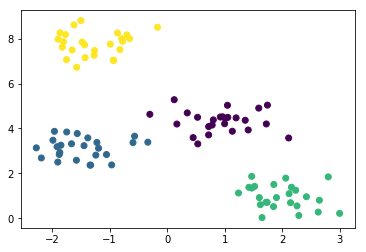

In [8]:
plt.scatter(X[:,0], X[:,1], c=k)

# 【問題2】エルボー法の実装

time : 0.0012922286987304688s
time : 0.004328250885009766s
time : 0.003083944320678711s
time : 0.0039920806884765625s
time : 0.0025489330291748047s
time : 0.004721879959106445s
time : 0.004960060119628906s
time : 0.0028731822967529297s
time : 0.002410888671875s
time : 0.0028738975524902344s


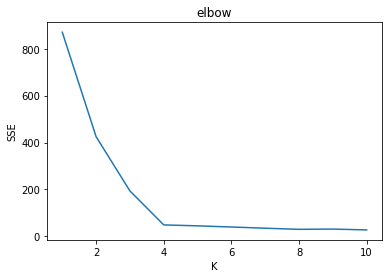

In [9]:
model.plot_elbow(X, 10)

## K＝４がエルボーに見える。散布図をみた印象と同じなので納得。

# 3.クラスタリング分析

卸売業者のデータ分析
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。

UCI Machine Learning Repository: Wholesale customers Data Set

Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。

In [10]:
import pandas as pd
df = pd.read_csv("Wholesale customers data.csv")

In [11]:
data = df.drop(["Channel", "Region"], axis=1)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
data = sc.fit_transform(data)

/Users/morio/.pyenv/versions/anaconda3-5.3.0/envs/python-ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/morio/.pyenv/versions/anaconda3-5.3.0/envs/python-ml/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
#PCAのサンプルコード
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(data)
data_pca = pca.transform(data)

[0.44082893 0.72459292 0.84793705 0.94189209 0.98950481 1.        ]


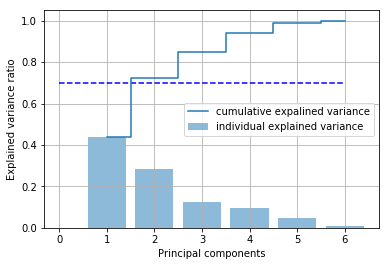

In [15]:
#PCAの分散説明率を表示するコードサンプル
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

# 【問題3】（アドバンス課題）シルエット図
$$s_n = \frac{b_n-a_n}{max(b_n,a_n)}$$

a
n
 : 凝集度。同じクラスタ内の他のデータ点との距離の平均値。

b
n
 : 乖離度。最も近い他のクラスタ内の全てのデータ点との距離の平均値。

乖離度 
b
 が大きく、凝集度 
a
 が小さい時が理想的であり、シルエット係数 
s
 は1に近くなります。

In [16]:
model = ScratchKMeans(10)
y_km = model.fit(data_pca)
silhouette_vals = model.silhouette(data_pca, y_km).reshape(-1)

time : 0.02008223533630371s


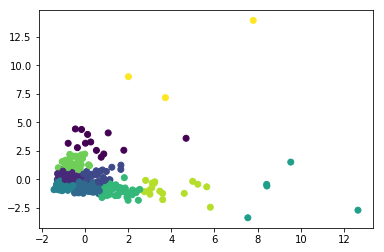

In [17]:
plt.scatter(data_pca[:,0], data_pca[:,1], c=y_km)

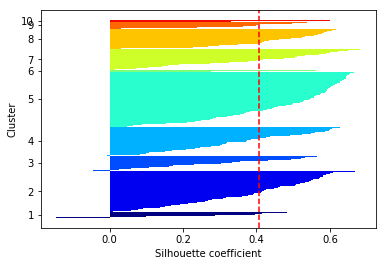

In [18]:
from matplotlib import cm

y_ax_lower, y_ax_upper = 0, 0
yticks = []
cluster_labels = np.unique(y_km)
n_clusters = len(cluster_labels)
silhouette_avg = silhouette_vals.mean()

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

# 【問題4】クラスタ数kの選択

time : 0.0054111480712890625s


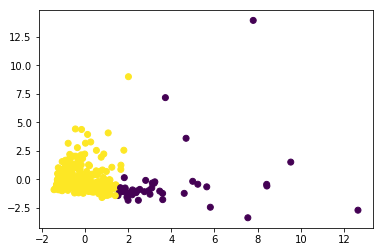

In [19]:
model2 = ScratchKMeans(2)
k2 = model2.fit(data_pca)
plt.scatter(data_pca[:,0], data_pca[:,1], c=k2)

time : 0.0025930404663085938s
time : 0.004077911376953125s
time : 0.003551006317138672s
time : 0.003798961639404297s
time : 0.005545854568481445s
time : 0.006718873977661133s
time : 0.011023759841918945s
time : 0.015250205993652344s
time : 0.014592885971069336s
time : 0.01603388786315918s
time : 0.01795196533203125s
time : 0.019028186798095703s
time : 0.016438722610473633s
time : 0.023607254028320312s
time : 0.01957392692565918s
time : 0.01805400848388672s
time : 0.020913124084472656s
time : 0.021810293197631836s
time : 0.03664207458496094s
time : 0.03181791305541992s


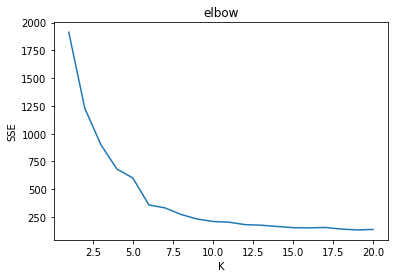

In [20]:
model2.plot_elbow(data_pca, 20)

## エルボーだとk=５？ですかね。　微妙。
## 問題３のシルエット図からだと、１０が良さそうに見えます。

## 下流でどう使うかで考えると、顧客のグルーピングをしてそこにマーケティングをかけていくと思うが、それも５ぐらいがいい気もします

# 【問題5】既知のグループとの比較
CHANNEL：顧客チャンネル - Horeca（ホテル/レストラン/カフェ）　法人か個人のような分け方か？

REGION:　地域 - リスノン、ポルトまたはその他の（公称）

In [21]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components = 1)
pca2.fit(data)
data_pca2 = pca2.transform(data)

In [22]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [23]:
columns = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
df["total"] =df[columns].sum(axis='columns')
df["K"] = k2

In [24]:
import seaborn as sns

Text(0.5, 1.0, 'pca1')

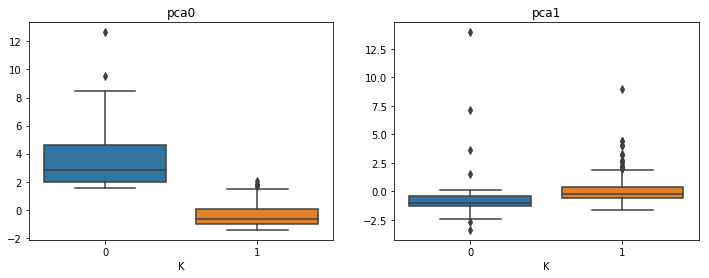

In [25]:
#pcaしたデータの箱ひげ図 Kはクラスタリングしたクラス
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ax1 = sns.boxplot(x="K", y=data_pca[:,0], data=df)
plt.title("pca0")
plt.subplot(1,2,2)
ax2 = sns.boxplot(x="K", y=data_pca[:,1], data=df)
plt.title("pca1")

### クラスタ間の位置関係を見ずにデータの分散しかみていないので意味ない図

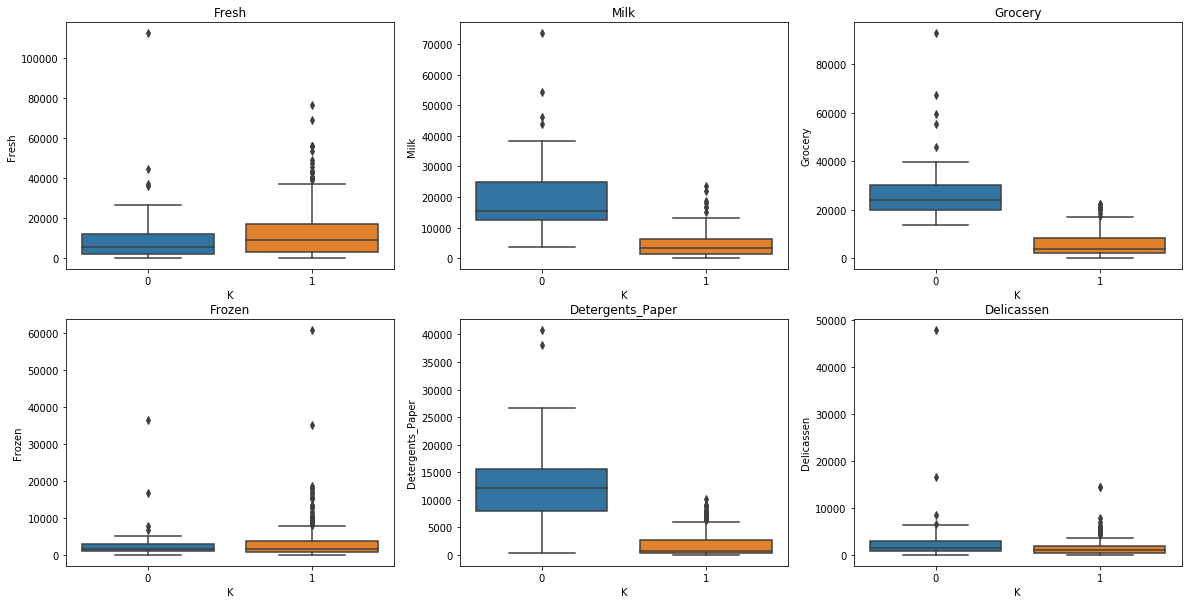

In [26]:
#特徴量すべての箱ひげ図 Kはクラスタリングしたクラス
columns = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
plt.figure(figsize=(20,10))

for i, column in enumerate(columns):
    plt.subplot(2,3, i+1)
    plt.title(column)
    sns.boxplot(x="K", y=column, data=df)

クラスター（0,1）と(2,3,4)のデータの分散が異なる。

各クラスターの分散をみているので、クラスター間の近さや位置がわからない。要するにこのボックスプロットだけで、クラスター（0と1）クラスター（2,3,4）でクラスターができるとは限らない。

クラスターは2次元情報なので、1次元ごとのばらつきをみてもクラスターの傾向を表しているとは言えない。

２つの図を使えば、クラスター0は広範囲に広がり、クラスター2,3,4は狭い範囲のクラスターである。

In [27]:
df["PCA_0"] = data_pca[:,0]
df["PCA_1"] = data_pca[:,1]

In [28]:
df_corr = df.corr()

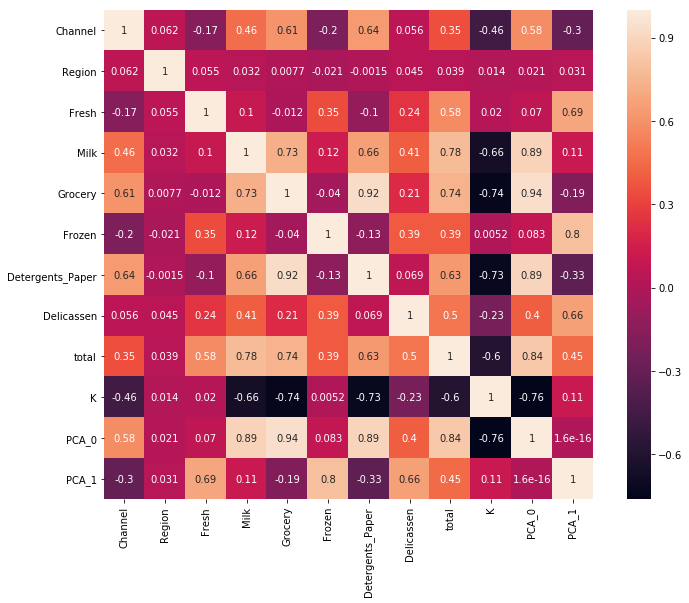

In [29]:
#ヒートマップで相関の可視化
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_corr, square=True, annot=True)


### PCA０はgroceryとの相関が非常に強い。Milk, Detergents_paperとも相関が強い。またchannelとの相関も高い。
 
### PCA1はFrozen、Fresh、Delicassenとの相関が強い。またchannelとの相関がない。

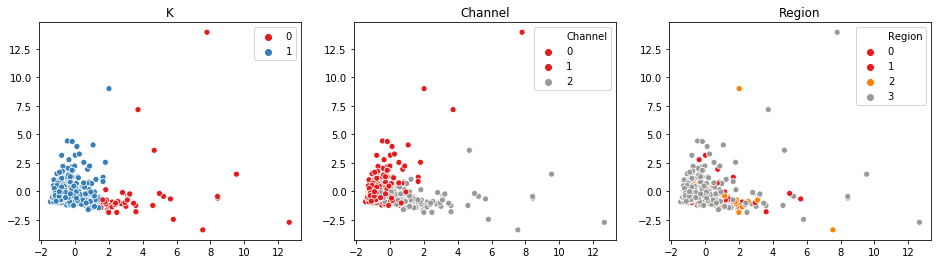

In [30]:
#クラスタごと、チャネルごと、レギオンごとの散布図
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.title("K")
sns.scatterplot(data_pca[:,0], data_pca[:,1], hue=k2, palette="Set1")
plt.subplot(1,3,2)
plt.title("Channel")
sns.scatterplot(data_pca[:,0], data_pca[:,1], hue=df["Channel"], palette="Set1")
plt.subplot(1,3,3)
plt.title("Region")
sns.scatterplot(data_pca[:,0], data_pca[:,1], hue=df["Region"], palette="Set1")

### channelの分け方がクラス分けに近い。クラスタリングした結果はchannelをさらに複数で分けた形になっている。
### regionでの図ではまとまりがなく、regionはあまり意味のある分け方ではないと思う。

# 【問題6】卸売業者にとって有益な情報

time : 0.00640106201171875s


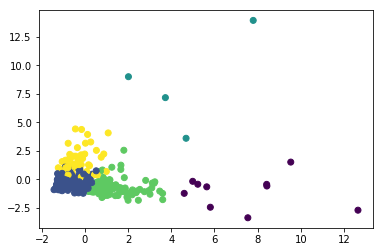

In [31]:
model2 = ScratchKMeans(5)
k2 = model2.fit(data)
plt.scatter(data_pca[:,0], data_pca[:,1], c=k2)

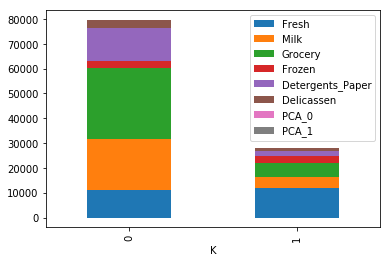

In [32]:
tumi_df = df.groupby("K").mean().drop(["Channel", "Region", "total"], axis=1)
tumi_df.plot(kind="bar",stacked=True)

クラス０は、fresh, frozen, milk,　delicassenの購入額が高い。トータルの購入額が一番高い。

クラス１は、grocery, milk, dategents_paperの購入額が高い。

クラス２は、freshの購入額が少し高いが他は低い。

クラス３は、fresh、frozenの購入額が高い

クラス４は、grocer、milkの購入額が高い

# 【問題7】（アドバンス課題）他の手法の調査
### DBSCAN - 非階層クラスタリング
メリット
k-meansと違って，最初にクラスタ数を決めなくてよい
とがったクラスタでも分類できる。クラスタが球状であることを前提としない
非線形でクラスタリングできる。

デメリット
計算コストが高い、データがわからないとハイパーパラメーターεを決めるのが難しい。



### t-SNE　- 次元削減
PCAでは高次元空間上で非線形構造を持っているデータに対しては適切な低次元表現が得られないがそこを改善した。

デメリット
うまくいくことが保証されているのは2or3次元への圧縮のみ
局所構造が次元の呪いの影響を受けやすい
最適化アルゴリズムの収束性が保証されていない

###  LLE 
非線形次元圧縮ができる

# 【問題8】（アドバンス課題）t-SNEとDBSCANの利用

In [33]:
from sklearn.manifold import TSNE 
ts = TSNE(perplexity=60, learning_rate=250)
data_tsne = ts.fit_transform(data)

In [34]:
from sklearn.cluster import DBSCAN 
db = DBSCAN(eps=1.14)
dbk = db.fit_predict(data_tsne)

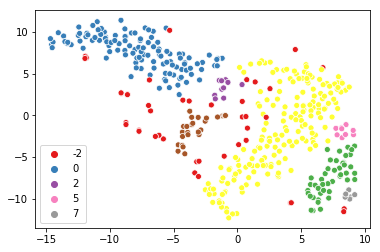

In [35]:
sns.scatterplot(data_tsne[:,0], data_tsne[:,1], hue=dbk, palette="Set1")

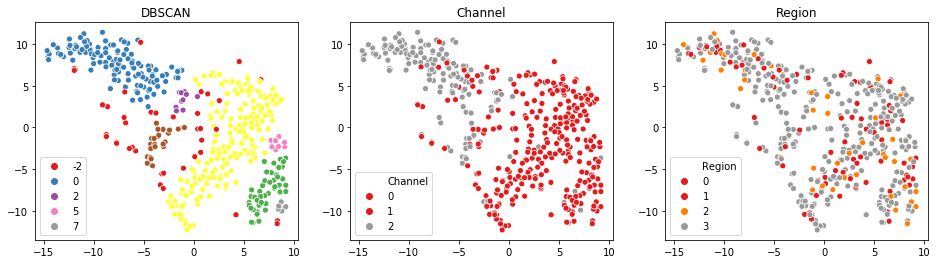

In [36]:
#クラスタごと、チャネルごと、レギオンごとの散布図
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.title("DBSCAN")
sns.scatterplot(data_tsne[:,0], data_tsne[:,1], hue=dbk, palette="Set1")
plt.subplot(1,3,2)
plt.title("Channel")
sns.scatterplot(data_tsne[:,0], data_tsne[:,1], hue=df["Channel"], palette="Set1")
plt.subplot(1,3,3)
plt.title("Region")
sns.scatterplot(data_tsne[:,0], data_tsne[:,1], hue=df["Region"], palette="Set1")

# 【問題9】教師なし学習と教師あり学習
教師なし学習は教師あり学習とどのような違いがあるか

正解ラベルを学習で与えるか与えないかが違う。

教師ありだとモデルのよさを判断することが簡単で指標の値で判断すれば良い。

教師ありは、予測に役立つ特徴量を選び、予測する。教師なしは出てきた規則性を人間が読み取っていく形になる。

教師なし学習は規則性を把握するのに有効。データの分析に役立そう。

ラスタリングしたクラスを特徴量として追加することで、教師あり学習でも役立つ。

教師なし学習は、不均衡データに対してモデルを作ることができる（例、異常検出）